In [1]:
import os
from matplotlib import pyplot as plt

os.chdir('/Users/rraj/PythonFunctions/DCNet/')
os.getcwd()

'/Users/rraj/PythonFunctions/DCNet'

In [2]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from tqdm import tqdm

mnist_data = MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)

mnist_test_data = MNIST(
    root = 'data',
    train = False,                         
    transform = transforms.ToTensor(), 
    download = True,            
)

In [3]:
import transformations
from transformations import Scale, ToVector
from layers import DiscriminationModule, AdaptationModule2
from initialization import DatasetInitializer, IdentityInitializer, RandomInitializer
from loading import SequentialLoader
from testing import TestModule
from plotting import ProjectionPlotter, LossPlotter

In [4]:
lr = 0.1
nepochs = 100
nbatches = 10
batch_size = 500

transform = transformations.Compose([Scale(), ToVector()])
loader = SequentialLoader(mnist_data, transforms=transform)
test_module = TestModule()
projection_plot = ProjectionPlotter(2)
loss_plot = LossPlotter()

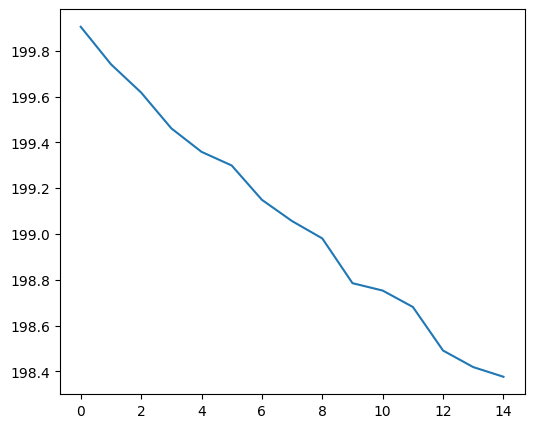

Epoch:2/100:  50%|█████     | 5/10 [00:52<00:52, 10.59s/it]

In [5]:
from torch.nn.functional import normalize

discrimination_layer = DiscriminationModule(200, DatasetInitializer(mnist_data, transforms=transform), beta=0.98)
adaptation_layer = AdaptationModule2(200, IdentityInitializer(), lr=lr, margin=0.1)
nanchors = []
loss = []

for epoch in range(nepochs):
    for batches in tqdm(range(nbatches), desc=f"Epoch:{epoch+1}/{nepochs}"):
        for x in loader(batch_size):
            x = discrimination_layer(x)
            x = adaptation_layer(x)
        discrimination_layer.organize()
        nanchors.append(adaptation_layer.nanchors)
        adaptation_layer.organize()
        loss_plot(adaptation_layer.loss.item())
    #test_outputs, targets = test_module([discrimination_layer, adaptation_layer], test_dataset=mnist_test_data, input_transforms=transform)
    #loss_plot(loss)

In [ ]:
test_outputs, targets = test_module([discrimination_layer, adaptation_layer], test_dataset=mnist_test_data, input_transforms=transform)
projection_plot(test_outputs, targets)

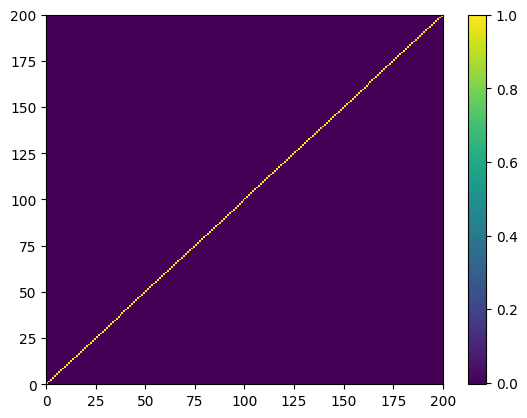

In [ ]:
plt.pcolormesh(adaptation_layer.connections)
plt.colorbar()

In [ ]:
adaptation_layer.connections.sum()

tensor(197.9373)

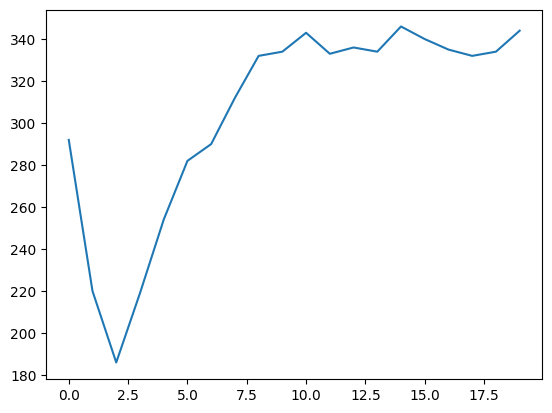

In [ ]:
plt.plot(nanchors)

In [ ]:
loss_plot.loss

[199.9676513671875,
 199.85833740234375,
 199.6912841796875,
 199.57763671875,
 nan,
 nan,
 nan]